In [3]:
import os
os.chdir('../src')
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import pandas as pd


In [4]:
from ulxlc import ULXLC
from constants import params_default


In [237]:
#lc_boost = lc_zero_incl_max_flux / lc_max
#       2 = 100 / 50

In [5]:
incls  = np.arange(0,91,1)
dincls = np.arange(0,46,1)
thetas = np.arange(0,46,1)

N_incls  = len(incls)
N_dincls = len(dincls)
N_thetas = len(thetas)

N_tot = N_incls*N_dincls*N_thetas

save_par = ['dincl', 'theta', 'incl', 'lc_min', 'lc_max', 'lc_boost']
N_save_par = len(save_par)

c_arr = (ctypes.c_double*N_save_par*N_tot)()

In [6]:
ulxlc = ULXLC()
ulxlc.libc.lc_boost(ulxlc.lc_t, ulxlc.lc_nt, ulxlc.lc_flux, c_arr, N_tot, N_save_par)
arr = np.ctypeslib.as_array(c_arr)

In [7]:
df = pd.DataFrame(arr)
df.columns = [*save_par]
df

,dincl,theta,incl,lc_min,lc_max,lc_boost
0,0.0,0.0,0.0,0.000000e+00,0.000000,NaN
1,0.0,0.0,1.0,0.000000e+00,0.000000,NaN
2,0.0,0.0,2.0,0.000000e+00,0.000000,NaN
3,0.0,0.0,3.0,0.000000e+00,0.000000,NaN
4,0.0,0.0,4.0,0.000000e+00,0.000000,NaN
...,...,...,...,...,...,...
192551,45.0,45.0,86.0,7.083388e-07,2.355834,1.114671
192552,45.0,45.0,87.0,7.083388e-07,2.321016,1.131392
192553,45.0,45.0,88.0,7.083388e-07,2.035433,1.290133
192554,45.0,45.0,89.0,7.083388e-07,1.926861,1.362828


In [238]:
df

,dincl,theta,incl,lc_min,lc_max,lc_boost
0,0.0,0.0,0.0,0.000000e+00,0.000000,NaN
1,0.0,0.0,1.0,0.000000e+00,0.000000,NaN
2,0.0,0.0,2.0,0.000000e+00,0.000000,NaN
3,0.0,0.0,3.0,0.000000e+00,0.000000,NaN
4,0.0,0.0,4.0,0.000000e+00,0.000000,NaN
...,...,...,...,...,...,...
192551,45.0,45.0,86.0,7.083388e-07,2.355834,1.114671
192552,45.0,45.0,87.0,7.083388e-07,2.321016,1.131392
192553,45.0,45.0,88.0,7.083388e-07,2.035433,1.290133
192554,45.0,45.0,89.0,7.083388e-07,1.926861,1.362828


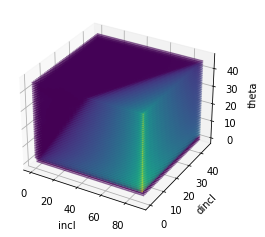

In [284]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = df['lc_boost']
ax.scatter(df['incl'], df['dincl'], df['theta'], c=Z, alpha=0.5, norm=colors.LogNorm(), s=0.5)
ax.set_xlabel('incl')
ax.set_ylabel('dincl')
ax.set_zlabel('theta')
plt.show()

In [20]:
df2

,dincl,theta,incl,lc_min,lc_max,lc_boost
910,0.0,10.0,0.0,3.148244e+01,31.482437,1.000000
911,0.0,10.0,1.0,3.195682e+01,31.956824,0.985155
912,0.0,10.0,2.0,3.242639e+01,32.426385,0.970890
913,0.0,10.0,3.0,3.286653e+01,32.866534,0.957887
914,0.0,10.0,4.0,3.364297e+01,33.642968,0.935781
...,...,...,...,...,...,...
189366,45.0,10.0,86.0,9.375072e-07,0.310260,113.653868
189367,45.0,10.0,87.0,9.375072e-07,0.288519,122.218139
189368,45.0,10.0,88.0,9.375072e-07,0.267578,131.783110
189369,45.0,10.0,89.0,9.375072e-07,0.243483,144.824539


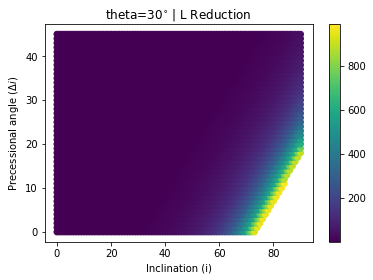

In [269]:
theta = 30
df2 = df[df['theta'] == theta]
df2 = df2[df2['lc_boost'] < 1000]
df2 = df2[df2['lc_boost'] > 0]

plt.figure(figsize=(6,4))
plt.title(fr'theta={theta}$^{{\circ}}$ | L Reduction')
plt.scatter(df2['incl'], df2['dincl'], c=df2['lc_boost'])
plt.xlabel('Inclination (i)')
plt.ylabel('Precessional angle ($\Delta i$)')
plt.colorbar()

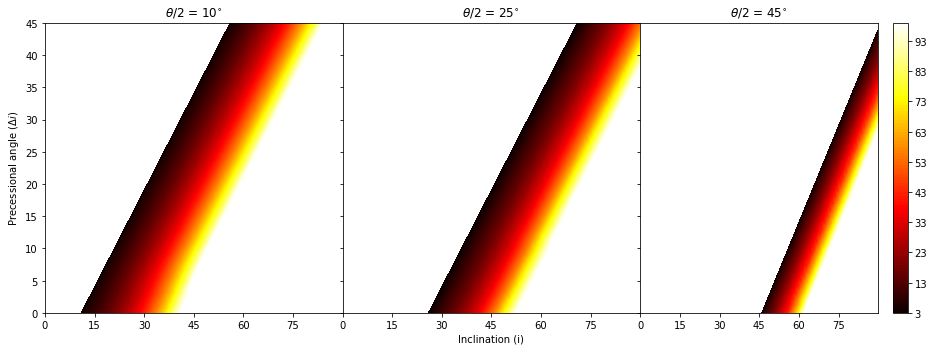

In [297]:
thetas = [10,25,45]
n_thetas = len(thetas)
#w = 6.93
w = 16
h = w/n_thetas
fig, ax = plt.subplots(nrows=1, ncols=n_thetas, sharey=True, sharex=True)
fig.set_size_inches([w,h])

cmap = plt.cm.get_cmap('hot')

for i, theta in enumerate(thetas):
    df2 = df[df['theta'] == theta]
    df2 = df2[df2['lc_boost'] < 100]
    df2 = df2[df2['lc_boost'] > 2]
    
    
    ax[i].set_title(fr'$\theta / 2$ = {theta}$^{{\circ}}$')
    #ax[i].scatter(df2['incl'], df2['dincl'], c=df2['lc_boost'], norm=colors.LogNorm())
    tri = ax[i].tricontourf(df2['incl'], df2['dincl'], df2['lc_boost'], levels=100, cmap=cmap)
    
ax[0].set_xlim(0,90)
ax[0].set_ylim(0,45)
ax[0].set_xticks(np.arange(0,90,15))




ax[1].set_xlabel('Inclination (i)')
ax[0].set_ylabel('Precessional angle ($\Delta i$)')
plt.subplots_adjust(hspace=0, wspace=0)
fig.colorbar(tri, ax=ax[-1], orientation='vertical')

In [249]:
df2

,dincl,theta,incl,lc_min,lc_max,lc_boost
4098,0.0,45.0,3.0,2.455058e+00,2.455058,1.001492
4133,0.0,45.0,38.0,2.447477e+00,2.447477,1.004594
4134,0.0,45.0,39.0,2.426809e+00,2.426809,1.013150
4135,0.0,45.0,40.0,2.399412e+00,2.399412,1.024718
4136,0.0,45.0,41.0,2.355834e+00,2.355834,1.043673
...,...,...,...,...,...,...
192551,45.0,45.0,86.0,7.083388e-07,2.355834,1.114671
192552,45.0,45.0,87.0,7.083388e-07,2.321016,1.131392
192553,45.0,45.0,88.0,7.083388e-07,2.035433,1.290133
192554,45.0,45.0,89.0,7.083388e-07,1.926861,1.362828
